## 데이터 불러오기

In [3]:
import pandas as pd
df=pd.read_csv('Credit.csv')
df=df.iloc[:,1:]
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## 더미변수 추가하기

In [4]:
categorical=df.columns[df.dtypes==object]
categorical

Index(['Gender', 'Student', 'Married', 'Ethnicity'], dtype='object')

In [5]:
df=pd.get_dummies(df,columns=categorical,drop_first=True)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,0,0,1,0,1


## X,y 변수 분리하기

In [6]:
y=df['Balance']
X=df.drop(columns='Balance', axis=1)
X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,0,0,1,0,1
1,106.025,6645,483,3,82,15,1,1,1,1,0
2,104.593,7075,514,4,71,11,0,0,0,1,0
3,148.924,9504,681,3,36,11,1,0,0,1,0
4,55.882,4897,357,2,68,16,0,0,1,0,1


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate

def reg_result(X,y, score='r2'):
    reg=LinearRegression()
    kfold=KFold(n_splits=5, random_state=42)
    
    if len(X.columns)==1:
        X=X.values.reshape(-1,1)
    
    result=cross_validate(reg,X,y,cv=kfold,
                          scoring=[score])
    if score=='r2':
        return result['test_r2'].mean()
    
    if score=='neg_mean_squared_error':
        return result['test_neg_mean_squared_error'].mean()

In [8]:
reg_result(X,y,'neg_mean_squared_error')

-10148.391001170388

## Forward Selection

In [9]:
import numpy as np
candidate_feature=list(X.columns)
selected_feature=[]
while(len(selected_feature)<=10):
    best_score=-1*np.inf
    for i in candidate_feature:
        temp_score=reg_result(X[selected_feature+[i]],y,'neg_mean_squared_error')
        if temp_score > best_score:
            best_feature = i
            best_score = temp_score
    selected_feature.append(best_feature)
    candidate_feature.remove(best_feature)
    print(selected_feature, best_score)


['Rating'] -54293.176584293506
['Rating', 'Income'] -26775.9542671427
['Rating', 'Income', 'Student_Yes'] -10851.452873514247
['Rating', 'Income', 'Student_Yes', 'Limit'] -10437.35840222544
['Rating', 'Income', 'Student_Yes', 'Limit', 'Cards'] -10062.13279601947
['Rating', 'Income', 'Student_Yes', 'Limit', 'Cards', 'Age'] -9957.23823664251
['Rating', 'Income', 'Student_Yes', 'Limit', 'Cards', 'Age', 'Gender_Female'] -9986.01635431523
['Rating', 'Income', 'Student_Yes', 'Limit', 'Cards', 'Age', 'Gender_Female', 'Education'] -10020.855738662753
['Rating', 'Income', 'Student_Yes', 'Limit', 'Cards', 'Age', 'Gender_Female', 'Education', 'Ethnicity_Caucasian'] -10062.944822665238
['Rating', 'Income', 'Student_Yes', 'Limit', 'Cards', 'Age', 'Gender_Female', 'Education', 'Ethnicity_Caucasian', 'Ethnicity_Asian'] -10087.232724184516
['Rating', 'Income', 'Student_Yes', 'Limit', 'Cards', 'Age', 'Gender_Female', 'Education', 'Ethnicity_Caucasian', 'Ethnicity_Asian', 'Married_Yes'] -10148.391001170

## Backward Selection

In [10]:
candidate_feature=list(X.columns)

while(len(candidate_feature)>=2):
    best_score=-1*np.inf
    for i in candidate_feature:
        temp_feature=candidate_feature[:]
        temp_feature.remove(i)
        temp_score=reg_result(X[temp_feature],y,'neg_mean_squared_error')
        if temp_score > best_score:
            best_feature = i
            best_score = temp_score
    candidate_feature.remove(best_feature)
    print(candidate_feature, best_score)


['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender_Female', 'Student_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian'] -10087.232724184261
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Gender_Female', 'Student_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian'] -10058.276311843161
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student_Yes', 'Ethnicity_Asian', 'Ethnicity_Caucasian'] -10027.160919038954
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student_Yes', 'Ethnicity_Caucasian'] -9998.80151791788
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student_Yes'] -9957.238236642299
['Income', 'Limit', 'Cards', 'Age', 'Student_Yes'] -10002.907840040647
['Income', 'Limit', 'Cards', 'Student_Yes'] -10110.614335509457
['Income', 'Limit', 'Student_Yes'] -11092.354282718356
['Income', 'Limit'] -27706.12222062765
['Limit'] -55090.63088149248


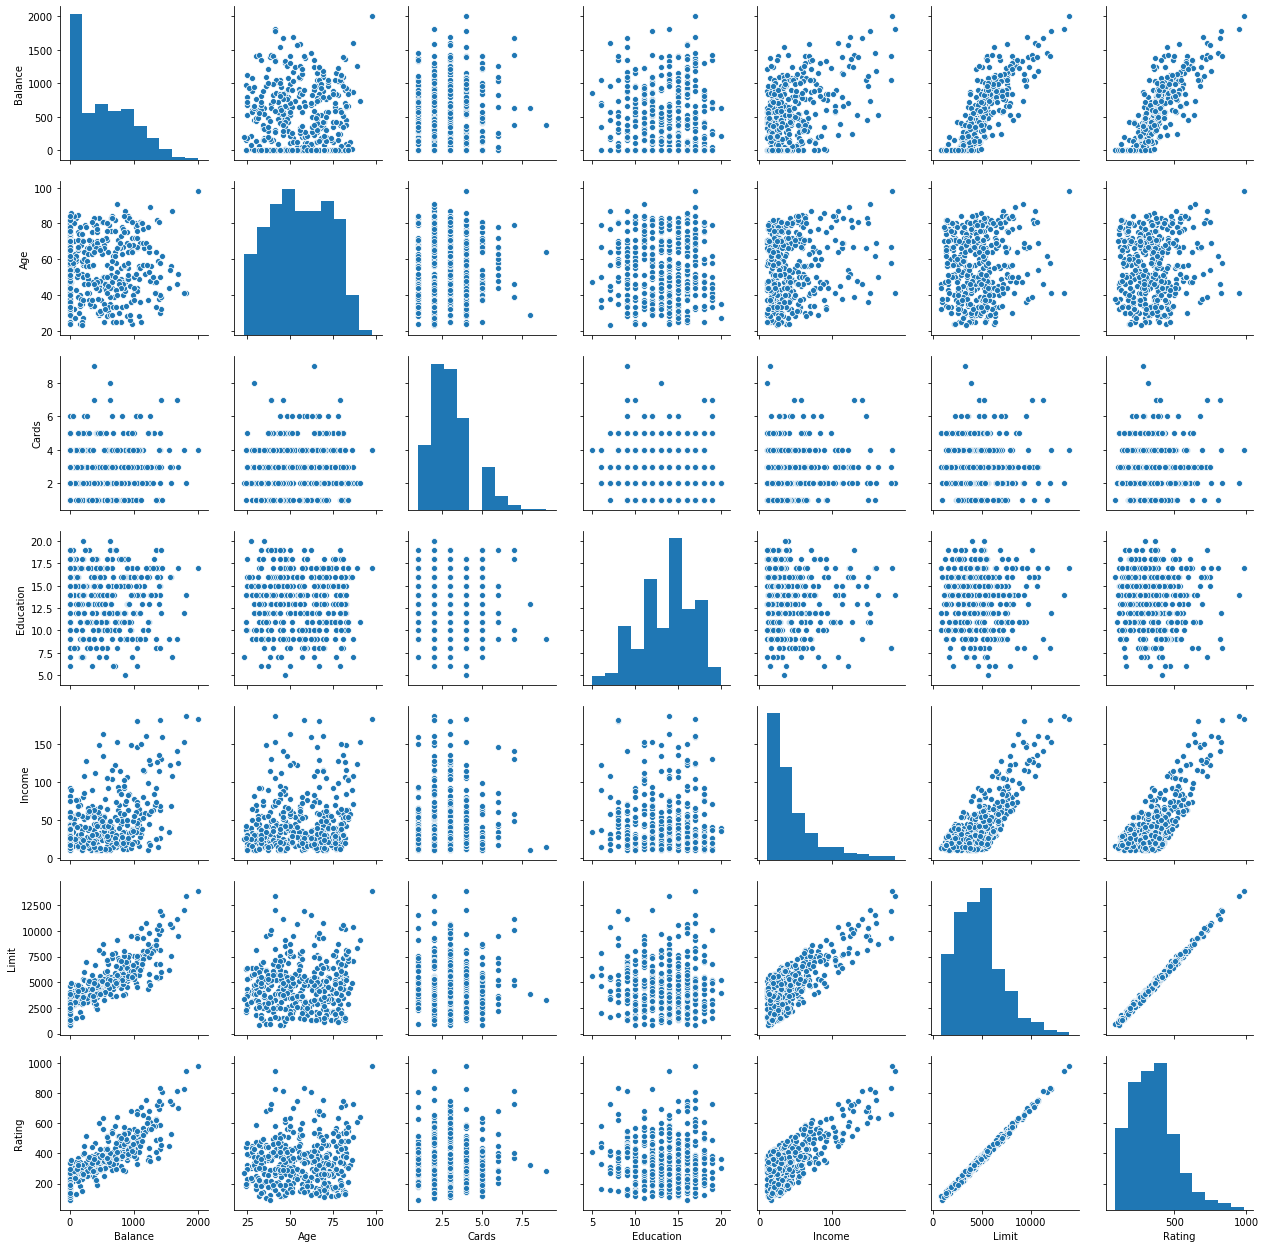

In [12]:
import seaborn as sns
sns.pairplot(df[['Balance','Age','Cards','Education','Income','Limit','Rating']])

## 타이타닉 데이터 Feature Selection